# Практика

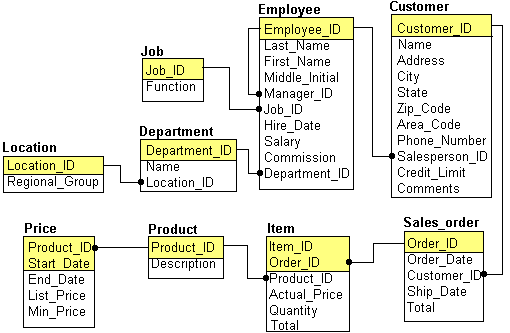

In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
# доступны student-ы от 0 до 9

DB_HOST = None
DB_USER = None
DB_USER_PASSWORD = None
DB_NAME = 'sample_db'

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
pd.read_sql_query("select * from customer", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,jocksports,345 viewridge,belmont,ca,96711,415,5986609,7844,5000.0,very friendly people to work with -- sales rep...
1,101,tkb sport shop,490 boli rd.,redwood city,ca,94061,415,3681223,7521,10000.0,rep called 5/8 about change in order - contact...
2,102,vollyrite,9722 hamilton,burlingame,ca,95133,415,6443341,7654,7000.0,company doing heavy promotion beginning 10/89....
3,103,just tennis,hillview mall,burlingame,ca,97544,415,6779312,7521,3000.0,contact rep about new line of tennis rackets.
4,104,every mountain,574 surry rd.,cupertino,ca,93301,408,9962323,7499,10000.0,customer with high market share (23%) due to a...
5,105,k + t sports,3476 el paseo,santa clara,ca,91003,408,3769966,7844,5000.0,tends to order large amounts of merchandise at...
6,106,shape up,908 sequoia,palo alto,ca,94301,415,3649777,7521,6000.0,support intensive. orders small amounts (< 800...
7,107,womens sports,valco village,sunnyvale,ca,93301,408,9674398,7499,10000.0,first sporting goods store geared exclusively ...
8,108,north woods health and fitness supply center,98 lone pine way,hibbing,mn,55649,612,5669123,7844,8000.0,
9,201,stadium sports,47 irving pl.,new york,ny,10003,212,5555335,7557,10000.0,large general-purpose sports store with an aff...


### Задание 1
Выбрать всю информацию о каждом отделе и месте его расположения.

In [ ]:
pd.read_sql_query("""
SELECT
  *
FROM 
  department INNER JOIN location
  ON department.location_id = location.location_id 
""", conn)

,department_id,name,location_id,location_id,regional_group
0,10,accounting,122,122,new york
1,20,research,124,124,dallas
2,30,sales,123,123,chicago
3,40,operations,167,167,boston
4,12,research,122,122,new york
5,13,sales,122,122,new york
6,14,operations,122,122,new york
7,23,sales,124,124,dallas
8,24,operations,124,124,dallas
9,34,operations,123,123,chicago


### Задание 2
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [ ]:
pd.read_sql_query("""
SELECT 
  employee.last_name, department.location_id, employee.job_id
FROM
  employee INNER JOIN department
  ON employee.department_id = department.department_id
GROUP BY
  employee.employee_id, department.location_id
""", conn)

,last_name,location_id,job_id
0,adams,124,667
1,king,122,672
2,fisher,122,669
3,douglas,122,667
4,blake,123,671
5,ford,124,669
6,sommers,123,668
7,doyle,122,671
8,clark,122,671
9,lewis,124,668


### Задание 3
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [ ]:
pd.read_sql_query("""
SELECT 
  COUNT(customer_id)
FROM employee INNER JOIN customer
ON employee.employee_id = customer.salesperson_id
WHERE employee.last_name LIKE 'turner'
""", conn)

,count
0,3


### Задание 4
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [ ]:
pd.read_sql_query("""
SELECT employee_id
FROM
 employee
WHERE 
employee_id NOT IN (SELECT salesperson_id FROM customer)
 """, conn)

,employee_id
0,7369
1,7505
2,7506
3,7507
4,7566
5,7569
6,7609
7,7676
8,7698
9,7782


### Задание 5
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [ ]:
pd.read_sql_query('''
SELECT
  employee.first_name, COUNT(customer.name)
FROM
  employee INNER JOIN customer ON employee.employee_id = customer.salesperson_id
WHERE
  employee_id IN (SELECT 
                    salesperson_id
                  FROM customer
                  GROUP BY 
                    salesperson_id
                  HAVING COUNT(customer_id) > 1)
GROUP BY employee.first_name
''', conn)


,first_name,count
0,raymond,2
1,mary,3
2,paul,7
3,kevin,2
4,karen,4
5,gregory,2
6,cynthia,3
7,livia,4
8,sarah,2
9,kenneth,2


### Задание 6
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [ ]:
pd.read_sql_query('''
(SELECT DISTINCT
                         employee.last_name
                      FROM 
                        customer INNER JOIN employee
                        ON customer.salesperson_id = employee.employee_id
                      )''', conn)

,last_name
0,ross
1,peters
2,martin
3,west
4,shaw
5,ward
6,turner
7,allen
8,duncan
9,porter


In [ ]:
pd.read_sql_query('''
SELECT
  SUM(total)
FROM 
  sales_order
WHERE customer_id IN (SELECT 
                        customer_id
                      FROM 
                        customer INNER JOIN employee
                        ON customer.salesperson_id = employee.employee_id
                      WHERE last_name = 'turner')

''', conn)

,sum
0,58055.9


### Задание 7
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г.

In [ ]:
pd.read_sql_query('''
SELECT SUM(actual_price)
FROM item
WHERE product_id IN (SELECT product_id
                      FROM product
                      WHERE description LIKE '%tennis%')
      AND product_id IN (SELECT item.product_id
                          FROM item INNER JOIN sales_order
                                ON item.order_id = sales_order.order_id
                                WHERE sales_order.order_date BETWEEN '1990-06-01' AND '1990-08-31')
''', conn)

,sum
0,1308.7


### Задание 8
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [ ]:
pd.read_sql_query('''
SELECT
  first_name, salary
FROM
  employee
WHERE hire_date IN (SELECT
                    MAX(hire_date) AS hire_date
                    FROM 
                      employee)
      OR
      hire_date IN (SELECT
                      MIN(hire_date) AS hire_date
                    FROM 
                      employee)
      
''',conn)

,first_name,salary
0,john,800.0
1,james,750.0


### Задание 9
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме.

In [ ]:
pd.read_sql_query('''
SELECT 
  employee_id,(salary -(SELECT
              AVG(salary)
            FROM employee
            WHERE job_id = 670)) AS AVG_salary
FROM 
  employee
WHERE job_id = 670
GROUP BY employee_id
''', conn)

,employee_id,avg_salary
0,7499,268.181818
1,7521,-81.818182
2,7555,-81.818182
3,7557,-81.818182
4,7560,-81.818182
5,7564,-81.818182
6,7600,-81.818182
7,7654,-81.818182
8,7789,168.181818
9,7820,-31.818182


### Задание 10
Вывести имена, средние инициалы и фамилии всех однофамильцев.

In [ ]:
pd.read_sql_query('''
SELECT 
  first_name, middle_initial
FROM 
  employee
WHERE last_name IN (SELECT
                      last_name
                    FROM
                      employee
                    GROUP BY
                      last_name
                    HAVING
                      COUNT(last_name) > 1)
''', conn)

,first_name,middle_initial


### Задание 11
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [ ]:
pd.read_sql_query('''
SELECT
  department_id, ROUND(CAST(COUNT(employee_id) AS DEC(12,4))/(SELECT COUNT(employee_id) FROM employee), 2) AS percent_employee,
  ROUND(SUM(salary)/(SELECT SUM(salary) FROM employee), 2) AS percent_salary
FROM 
  employee
GROUP BY 
  department_id
''', conn)

,department_id,percent_employee,percent_salary
0,34,0.03,0.03
1,43,0.03,0.02
2,10,0.09,0.14
3,12,0.13,0.16
4,24,0.03,0.03
5,30,0.19,0.15
6,14,0.03,0.04
7,20,0.16,0.18
8,13,0.16,0.12
9,23,0.16,0.12


### Задание 12
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

In [ ]:
#Исправленная версия
pd.read_sql_query('''
SELECT last_name 
FROM  employee 
WHERE employee_id IN(SELECT manager_id
                      FROM employee
                      WHERE employee_id IN (SELECT manager_id
                                            FROM  employee))
''', conn)

,last_name
0,jones
1,alberts
2,king


### Задание 13
Выбрать названия отдела, заключившего сделки на самую большую сумму, и города, в котором он находится.

Два решения одного задания.\
Второе решение даже чуть-чуть быстрее работает

In [ ]:
%%timeit
pd.read_sql_query('''
SELECT DISTINCT
  department.department_id, department.name, location.regional_group, SUM(sales_order.total)
FROM
 location, department, employee, customer, sales_order
WHERE
 location.location_id = department.location_id
 AND
 department.department_id = employee.department_id
 AND
 employee.employee_id = customer.salesperson_id
 AND
 customer.customer_id = sales_order.customer_id
GROUP BY
  department.department_id, location.location_id
ORDER BY 4 DESC
LIMIT 1

''', conn)

10 loops, best of 3: 45.3 ms per loop


In [ ]:
%%timeit
pd.read_sql_query('''
SELECT 
  name, department_id, regional_group
FROM 
  department INNER JOIN location
  ON
  department.location_id = location.location_id
WHERE department_id IN (SELECT
                           department_id
                        FROM
                          employee
                        WHERE 
                          employee_id IN (SELECT
                                            salesperson_id
                                          FROM
                                            customer
                                          WHERE
                                            customer_id IN (SELECT
                                                              customer_id
                                                            FROM
                                                              sales_order
                                                            WHERE 
                                                              total IN (SELECT
                                                                          MAX(total) AS total
                                                                        FROM
                                                                          sales_order))))
''', conn)

10 loops, best of 3: 44.9 ms per loop


### Задание 14
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

In [ ]:
pd.read_sql_query('''
SELECT
  product.description,
  item.actual_price,
  price.start_date,
  price.end_date,
  sales_order.order_date
FROM
  price
  INNER JOIN
  product
  ON price.product_id = product.product_id
  INNER JOIN
  item
  ON product.product_id = item.product_id
  INNER JOIN
  sales_order
  ON item.order_id = sales_order.order_id
WHERE
    item.actual_price < price.list_price * 0.75
  AND
    (sales_order.order_date < price.end_date OR price.end_date IS NULL)
  AND 
    (sales_order.order_date < price.end_date OR price.end_date IS NULL)
  AND
    price.start_date < sales_order.order_date
''', conn)

,description,actual_price,start_date,end_date,order_date
0,sb energy bar-6 pack,1.75,1990-11-15,None,1991-02-02
1,yellow jersey bicycle gloves,10.00,1990-06-01,None,1990-09-04
2,yellow jersey bicycle gloves,10.00,1990-06-01,None,1991-03-04


### Задание 15
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

In [ ]:
#исправленная версия
pd.read_sql_query('''
SELECT SUM(list_price * filtr.quantity - filtr.total) AS sum_discount
FROM price INNER JOIN(
                        SELECT 
                          item.product_id, item.actual_price, item.total, item.quantity, sales_order.order_date
                        FROM
                         sales_order INNER JOIN item
                         ON sales_order.order_id = item.order_id
                        WHERE
                         customer_id IN(
                               SELECT
                                customer_id
                               FROM
                                customer
                               WHERE name LIKE '%stadium sports%')
                         AND order_date BETWEEN '1989-01-01' AND '1989-12-31') AS filtr
      
     ON price.product_id = filtr.product_id
WHERE 
  filtr.order_date > price.start_date
  AND
  (filtr.order_date < price.end_date OR end_date IS NULL)
  ''', conn)

,sum_discount
0,356.9


### Задание 16
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого.

In [ ]:
pd.read_sql_query('''
SELECT
  e.employee_id, em.last_name
FROM 
  employee AS E, employee AS EM
WHERE E.employee_id = EM.manager_id
''', conn)

,employee_id,last_name
0,7902,smith
1,7698,allen
2,7839,doyle
3,7839,dennis
4,7839,baker
5,7698,ward
6,7505,peters
7,7505,shaw
8,7506,duncan
9,7506,lange


### Задание 17
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [ ]:
pd.read_sql_query('''
SELECT
  employee.employee_id, ROUND((employee.salary - avgs.salary_avg), 2) AS difference_salary
FROM 
  employee, (SELECT
                job_id, AVG(salary) AS salary_avg
             FROM
              employee
             GROUP BY
              job_id) AS avgs
WHERE employee.job_id = avgs.job_id


''', conn)

,employee_id,difference_salary
0,7369,-121.43
1,7499,268.18
2,7505,125.00
3,7506,25.00
4,7507,-525.00
5,7521,-81.82
6,7555,-81.82
7,7557,-81.82
8,7560,-81.82
9,7564,-81.82


### Задание 18
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам.



In [ ]:
import seaborn as sns

,year,sales
0,1989.0,5830.0
1,1990.0,5337.3
2,1991.0,3597.0


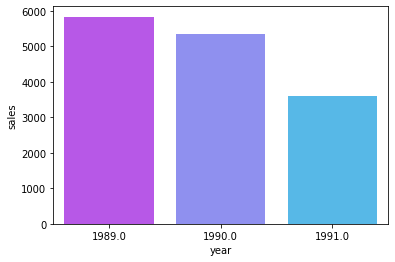

In [ ]:
sales = pd.read_sql_query('''
SELECT
  EXTRACT(YEAR FROM sales_order.order_date) AS year, SUM(item.total) AS sales
FROM
  item INNER JOIN sales_order
  ON item.order_id = sales_order.order_id
WHERE item.product_id IN (SELECT
                            product_id
                          FROM
                            product
                          WHERE description  = 'dunk basketball indoor')
GROUP BY
  EXTRACT(YEAR FROM sales_order.order_date)
''', conn)
sns.barplot(data = sales, x = 'year', y = 'sales', palette = 'cool_r')
sales

### Задание 19
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

In [ ]:
pd.read_sql_query('''
SELECT
  *
FROM
  (SELECT 
    last_name,
    salary,
    COALESCE(NULL, commission, 0) AS commission,
    (salary + COALESCE(NULL, commission, 0)) AS total_income 
   FROM
    employee) AS x
WHERE total_income > 2000
''', conn)

,last_name,salary,commission,total_income
0,doyle,2850.0,0.0,2850.0
1,dennis,2750.0,0.0,2750.0
2,baker,2200.0,0.0,2200.0
3,shaw,1250.0,1200.0,2450.0
4,jones,2975.0,0.0,2975.0
5,alberts,3000.0,0.0,3000.0
6,porter,1250.0,900.0,2150.0
7,martin,1250.0,1400.0,2650.0
8,blake,2850.0,0.0,2850.0
9,clark,2450.0,0.0,2450.0


### Задание 20
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

In [ ]:
pd.read_sql_query('''
SELECT description, old.list_price, new.list_price
FROM product,
  (SELECT product_id, list_price
    FROM price
    WHERE start_date<='15-DEC-89'
    AND end_date>'15-DEC-89' ) as old,
  (SELECT product_id, list_price
    FROM price
    WHERE end_date IS NULL) as new
WHERE old.product_id=product.product_id
  AND new.product_id= product.product_id
  AND old.list_price*1.15 < new.list_price
''', conn)

,description,list_price,list_price
0,ace tennis racket i,30.0,35.0
1,ace tennis racket ii,39.0,45.0
2,dunk basketball professional,50.0,58.3
3,yellow jersey bicycle gloves,10.0,15.0
4,yellow jersey water bottle,2.0,3.0
5,yellow jersey bottle cage,5.0,6.0
